In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Import the time module.
import time
# Get today's date in seconds.
today = time.time()

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90., high=90., size=1500)
lngs = np.random.uniform(low=-180., high=180., size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

port alfred za
port alfred za
ler sd
dingle ie
callosa de segura es
rikitea pf
puerto ayora ec
umea se
corinth us
bredasdorp za
port elizabeth za
albany au
hilo us
attawapiskat ca
carnarvon au
quemado de guines cu
busselton au
rikitea pf
bluff nz
east london za
belushya guba ru
avarua ck
lang son vn
bluff nz
jamestown sh
nizhneyansk ru
namibe ao
arraial do cabo br
hermanus za
nikolskoye ru
bathsheba bb
ribeira grande pt
leh in
saint george bm
samusu ws
castro cl
yar-sale ru
hermanus za
ushuaia ar
alexandria us
punta arenas cl
ixtapa mx
east london za
boende cd
qaanaaq gl
hilo us
alofi nu
bilibino ru
okhotsk ru
punta arenas cl
ushuaia ar
tasiilaq gl
san patricio mx
santiago cl
palencia es
pevek ru
rikitea pf
pimentel pe
bambanglipuro id
srednekolymsk ru
buzdyak ru
namibe ao
kaa-khem ru
yen bai vn
airai pw
sisimiut gl
lompoc us
hermanus za
kaitangata nz
asau tv
mineros bo
bambous virieux mu
hithadhoo mv
avarua ck
nouakchott mr
nishihara jp
los llanos de aridane es
sola vu
los llanos de a

raga sd
kromy ru
saldanha za
kananga cd
chokurdakh ru
albany au
leo bf
busselton au
eyl so
auki sb
belushya guba ru
barbar sd
rikitea pf
punta arenas cl
provideniya ru
lalas gr
albany au
sentyabrskiy ru
nizhneyansk ru
punta arenas cl
bluff nz
mataura pf
quatre cocos mu
souillac mu
san quintin mx
mataura pf
qaanaaq gl
buala sb
thompson ca
belushya guba ru
muros es
teya ru
kapaa us
krasnoyarskiy ru
atuona pf
ndele cf
galle lk
warrington us
port hedland au
yarmouth ca
castro cl
northam au
san policarpo ph
punta arenas cl
saryshagan kz
yeppoon au
ramgarh in
gunjur gm
vaini to
nadym ru
taltal cl
carnarvon au
chokurdakh ru
olovyannaya ru
albany au
souillac mu
airai pw
yulara au
puerto ayora ec
pisco pe
conceicao do mato dentro br
busselton au
new norfolk au
lompoc us
busselton au
taolanaro mg
huzhou cn
albany au
lebedinyy ru
lompoc us
zhangye cn
jamestown sh
barra do garcas br
busselton au
puerto ayora ec
nchelenge zm
sobolevo ru
new norfolk au
bluff nz
cape town za
vestmannaeyjar is
norman 

cidreira br
haimen cn
port alfred za
taolanaro mg
georgetown sh
dauriya ru
port moresby pg
neiafu to
bafoulabe ml
mys shmidta ru
urusha ru
roxana cr
albany au
punta arenas cl
souillac mu
tawkar sd
barentsburg sj
bilopillya ua
taolanaro mg
ushuaia ar
taos us
kapaa us
punta arenas cl
livingstone zm
butaritari ki
vyshestebliyevskaya ru
karaul ru
rikitea pf
jarjis tn
hithadhoo mv


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14d496981f3ab4ab4fbc15adae63ab96


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | ler
Processing Record 3 of Set 1 | dingle
Processing Record 4 of Set 1 | callosa de segura
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | umea
Processing Record 8 of Set 1 | corinth
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | quemado de guines
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | lang son
Processin

Processing Record 39 of Set 4 | yomou
Processing Record 40 of Set 4 | ilinsko-podomskoye
City not found. Skipping...
Processing Record 41 of Set 4 | ginir
Processing Record 42 of Set 4 | te anau
Processing Record 43 of Set 4 | college
Processing Record 44 of Set 4 | kirkwall
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | ballina
Processing Record 47 of Set 4 | linchuan
City not found. Skipping...
Processing Record 48 of Set 4 | bangkalan
Processing Record 49 of Set 4 | tecoanapa
Processing Record 50 of Set 4 | barda
Processing Record 1 of Set 5 | tual
Processing Record 2 of Set 5 | lebu
Processing Record 3 of Set 5 | najran
Processing Record 4 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 5 | alice springs
Processing Record 6 of Set 5 | vanavara
Processing Record 7 of Set 5 | auki
Processing Record 8 of Set 5 | palmer
Processing Record 9 of Set 5 | plettenberg bay
Processing Record 10 of Set 5 | faanui
Processing Record 11 of Se

Processing Record 28 of Set 8 | gunjur
Processing Record 29 of Set 8 | nadym
Processing Record 30 of Set 8 | taltal
Processing Record 31 of Set 8 | olovyannaya
Processing Record 32 of Set 8 | yulara
Processing Record 33 of Set 8 | conceicao do mato dentro
Processing Record 34 of Set 8 | huzhou
Processing Record 35 of Set 8 | lebedinyy
Processing Record 36 of Set 8 | barra do garcas
Processing Record 37 of Set 8 | nchelenge
Processing Record 38 of Set 8 | sobolevo
Processing Record 39 of Set 8 | vestmannaeyjar
Processing Record 40 of Set 8 | manggar
Processing Record 41 of Set 8 | chimoio
Processing Record 42 of Set 8 | dhidhdhoo
Processing Record 43 of Set 8 | goderich
Processing Record 44 of Set 8 | amderma
City not found. Skipping...
Processing Record 45 of Set 8 | cayenne
Processing Record 46 of Set 8 | strezhevoy
Processing Record 47 of Set 8 | gobabis
Processing Record 48 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 49 of Set 8 | abu kamal
Processing Reco

Processing Record 15 of Set 12 | deloraine
Processing Record 16 of Set 12 | sakakah
Processing Record 17 of Set 12 | saint-joseph
Processing Record 18 of Set 12 | cutervo
Processing Record 19 of Set 12 | worland
Processing Record 20 of Set 12 | rabat
Processing Record 21 of Set 12 | west wendover
Processing Record 22 of Set 12 | kuloy
Processing Record 23 of Set 12 | pochutla
Processing Record 24 of Set 12 | illapel
Processing Record 25 of Set 12 | sri aman
Processing Record 26 of Set 12 | saravan
Processing Record 27 of Set 12 | phan rang
City not found. Skipping...
Processing Record 28 of Set 12 | abalak
Processing Record 29 of Set 12 | beni suef
Processing Record 30 of Set 12 | soyo
Processing Record 31 of Set 12 | aksha
Processing Record 32 of Set 12 | conceicao do araguaia
Processing Record 33 of Set 12 | kavaje
Processing Record 34 of Set 12 | haimen
Processing Record 35 of Set 12 | dauriya
Processing Record 36 of Set 12 | port moresby
Processing Record 37 of Set 12 | neiafu
Proc

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,65.25,82,28,19.91,ZA,2021-09-27 04:13:18
1,Ler,8.3018,30.1418,69.33,92,98,2.19,SS,2021-09-27 04:16:00
2,Dingle,10.9995,122.6711,87.13,70,91,8.37,PH,2021-09-27 04:13:33
3,Callosa De Segura,38.1250,-0.8782,71.24,77,99,3.00,ES,2021-09-27 04:16:01
4,Rikitea,-23.1203,-134.9692,73.76,72,8,19.28,PF,2021-09-27 04:08:29
5,Puerto Ayora,-0.7393,-90.3518,68.63,92,66,7.23,EC,2021-09-27 04:14:49
6,Umea,63.8284,20.2597,48.90,100,40,0.00,SE,2021-09-27 04:12:02
7,Corinth,37.9407,22.9573,71.69,50,0,5.03,GR,2021-09-27 04:16:02
8,Bredasdorp,-34.5322,20.0403,53.28,96,33,2.89,ZA,2021-09-27 04:13:10
9,Port Elizabeth,-33.9180,25.5701,55.09,91,32,7.67,ZA,2021-09-27 04:13:52


In [10]:
city_data_df = city_data_df[['City', 'Country', 'Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2021-09-27 04:13:18,-33.5906,26.8910,65.25,82,28,19.91
1,Ler,SS,2021-09-27 04:16:00,8.3018,30.1418,69.33,92,98,2.19
2,Dingle,PH,2021-09-27 04:13:33,10.9995,122.6711,87.13,70,91,8.37
3,Callosa De Segura,ES,2021-09-27 04:16:01,38.1250,-0.8782,71.24,77,99,3.00
4,Rikitea,PF,2021-09-27 04:08:29,-23.1203,-134.9692,73.76,72,8,19.28
5,Puerto Ayora,EC,2021-09-27 04:14:49,-0.7393,-90.3518,68.63,92,66,7.23
6,Umea,SE,2021-09-27 04:12:02,63.8284,20.2597,48.90,100,40,0.00
7,Corinth,GR,2021-09-27 04:16:02,37.9407,22.9573,71.69,50,0,5.03
8,Bredasdorp,ZA,2021-09-27 04:13:10,-34.5322,20.0403,53.28,96,33,2.89
9,Port Elizabeth,ZA,2021-09-27 04:13:52,-33.9180,25.5701,55.09,91,32,7.67


In [12]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

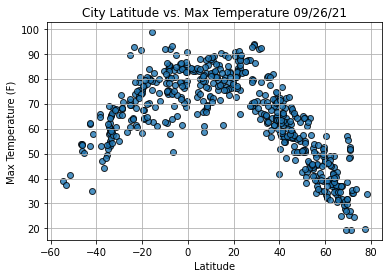

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

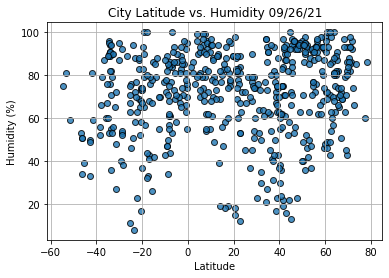

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

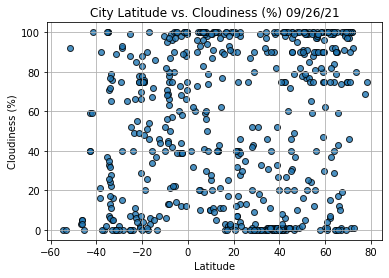

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

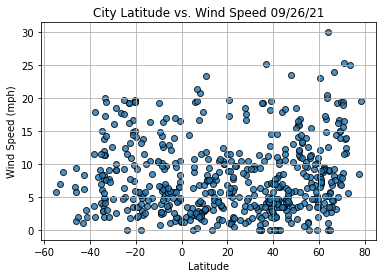

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()